In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()
print("-" * 30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


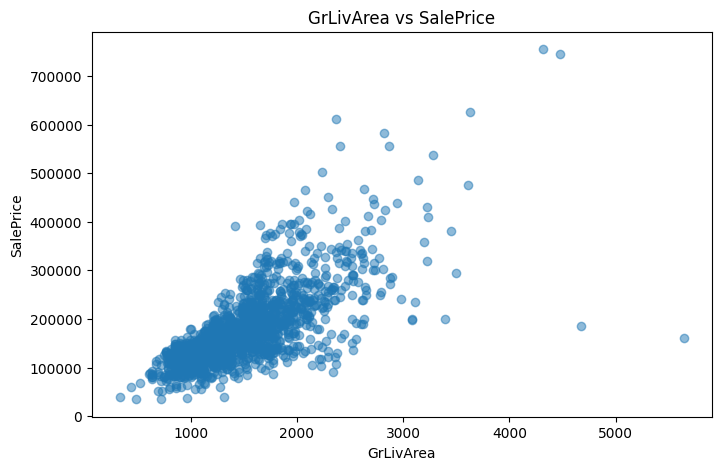

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df["GrLivArea"], df["SalePrice"], alpha=0.5)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice")
plt.show()

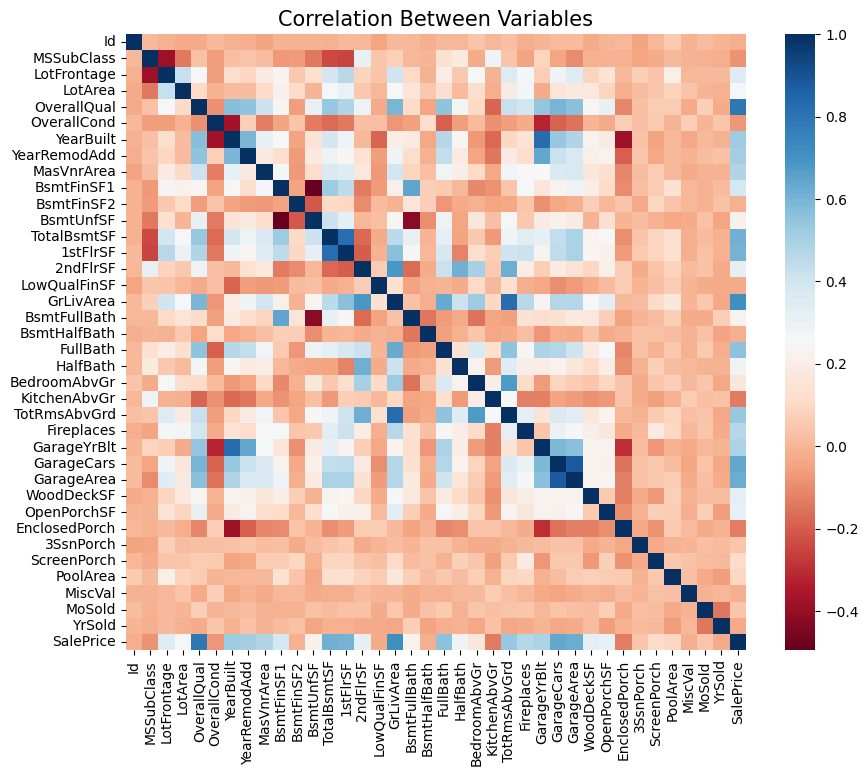

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

In [9]:
df = df.drop(df[(df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000)].index)

important_num_cols = list(df.corr(numeric_only=True)["SalePrice"].loc[lambda x: (x > 0.5) | (x < -0.5)].index)
num_features = [col for col in important_num_cols if col != "SalePrice"]
cat_cols = df.select_dtypes(include="object").columns.tolist()

feature_cols = num_features + cat_cols

X_train = df[feature_cols]
Y_train = df["SalePrice"]

X_test = test_df[feature_cols]

In [10]:
print("Missing Values by Column")
print("-"*30)
print(X_train.isna().sum())
print("-"*30)
print(X_test.isna().sum())
print("TOTAL MISSING VALUES OF TRAINING SET:",X_train.isna().sum().sum())
print("TOTAL MISSING VALUES OF TEST SET:",X_test.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual         0
YearBuilt           0
YearRemodAdd        0
TotalBsmtSF         0
1stFlrSF            0
GrLivArea           0
FullBath            0
TotRmsAbvGrd        0
GarageCars          0
GarageArea          0
MSZoning            0
Street              0
Alley            1367
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       69

In [11]:
for col in [X_train, X_test]:
    missing_ratio = col.isnull().mean()
    drop_cols = missing_ratio[missing_ratio > 0.35].index
    col.drop(columns=drop_cols, inplace=True)

for col in X_train.columns: 
    if X_train[col].isna().sum().sum() > 0:
        if X_train[col].dtype != "object":
            X_train[col] = X_train[col].fillna(X_train[col].dropna().median())
        else:
            X_train[col] = X_train[col].fillna(X_train[col].dropna().mode()[0])

for col in X_test.columns: 
    if X_test[col].isna().sum().sum() > 0:
        if X_test[col].dtype != "object":
            X_test[col] = X_test[col].fillna(X_test[col].dropna().median())
        else:
            X_test[col] = X_test[col].fillna(X_test[col].dropna().mode()[0])

print(X_train.isna().sum())
print(" ")
print("-"*30)
print(" ")
print(X_test.isna().sum())

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64
 
------------------------------
 
OverallQual      0
YearBuilt        0
YearRemodAdd     0
To

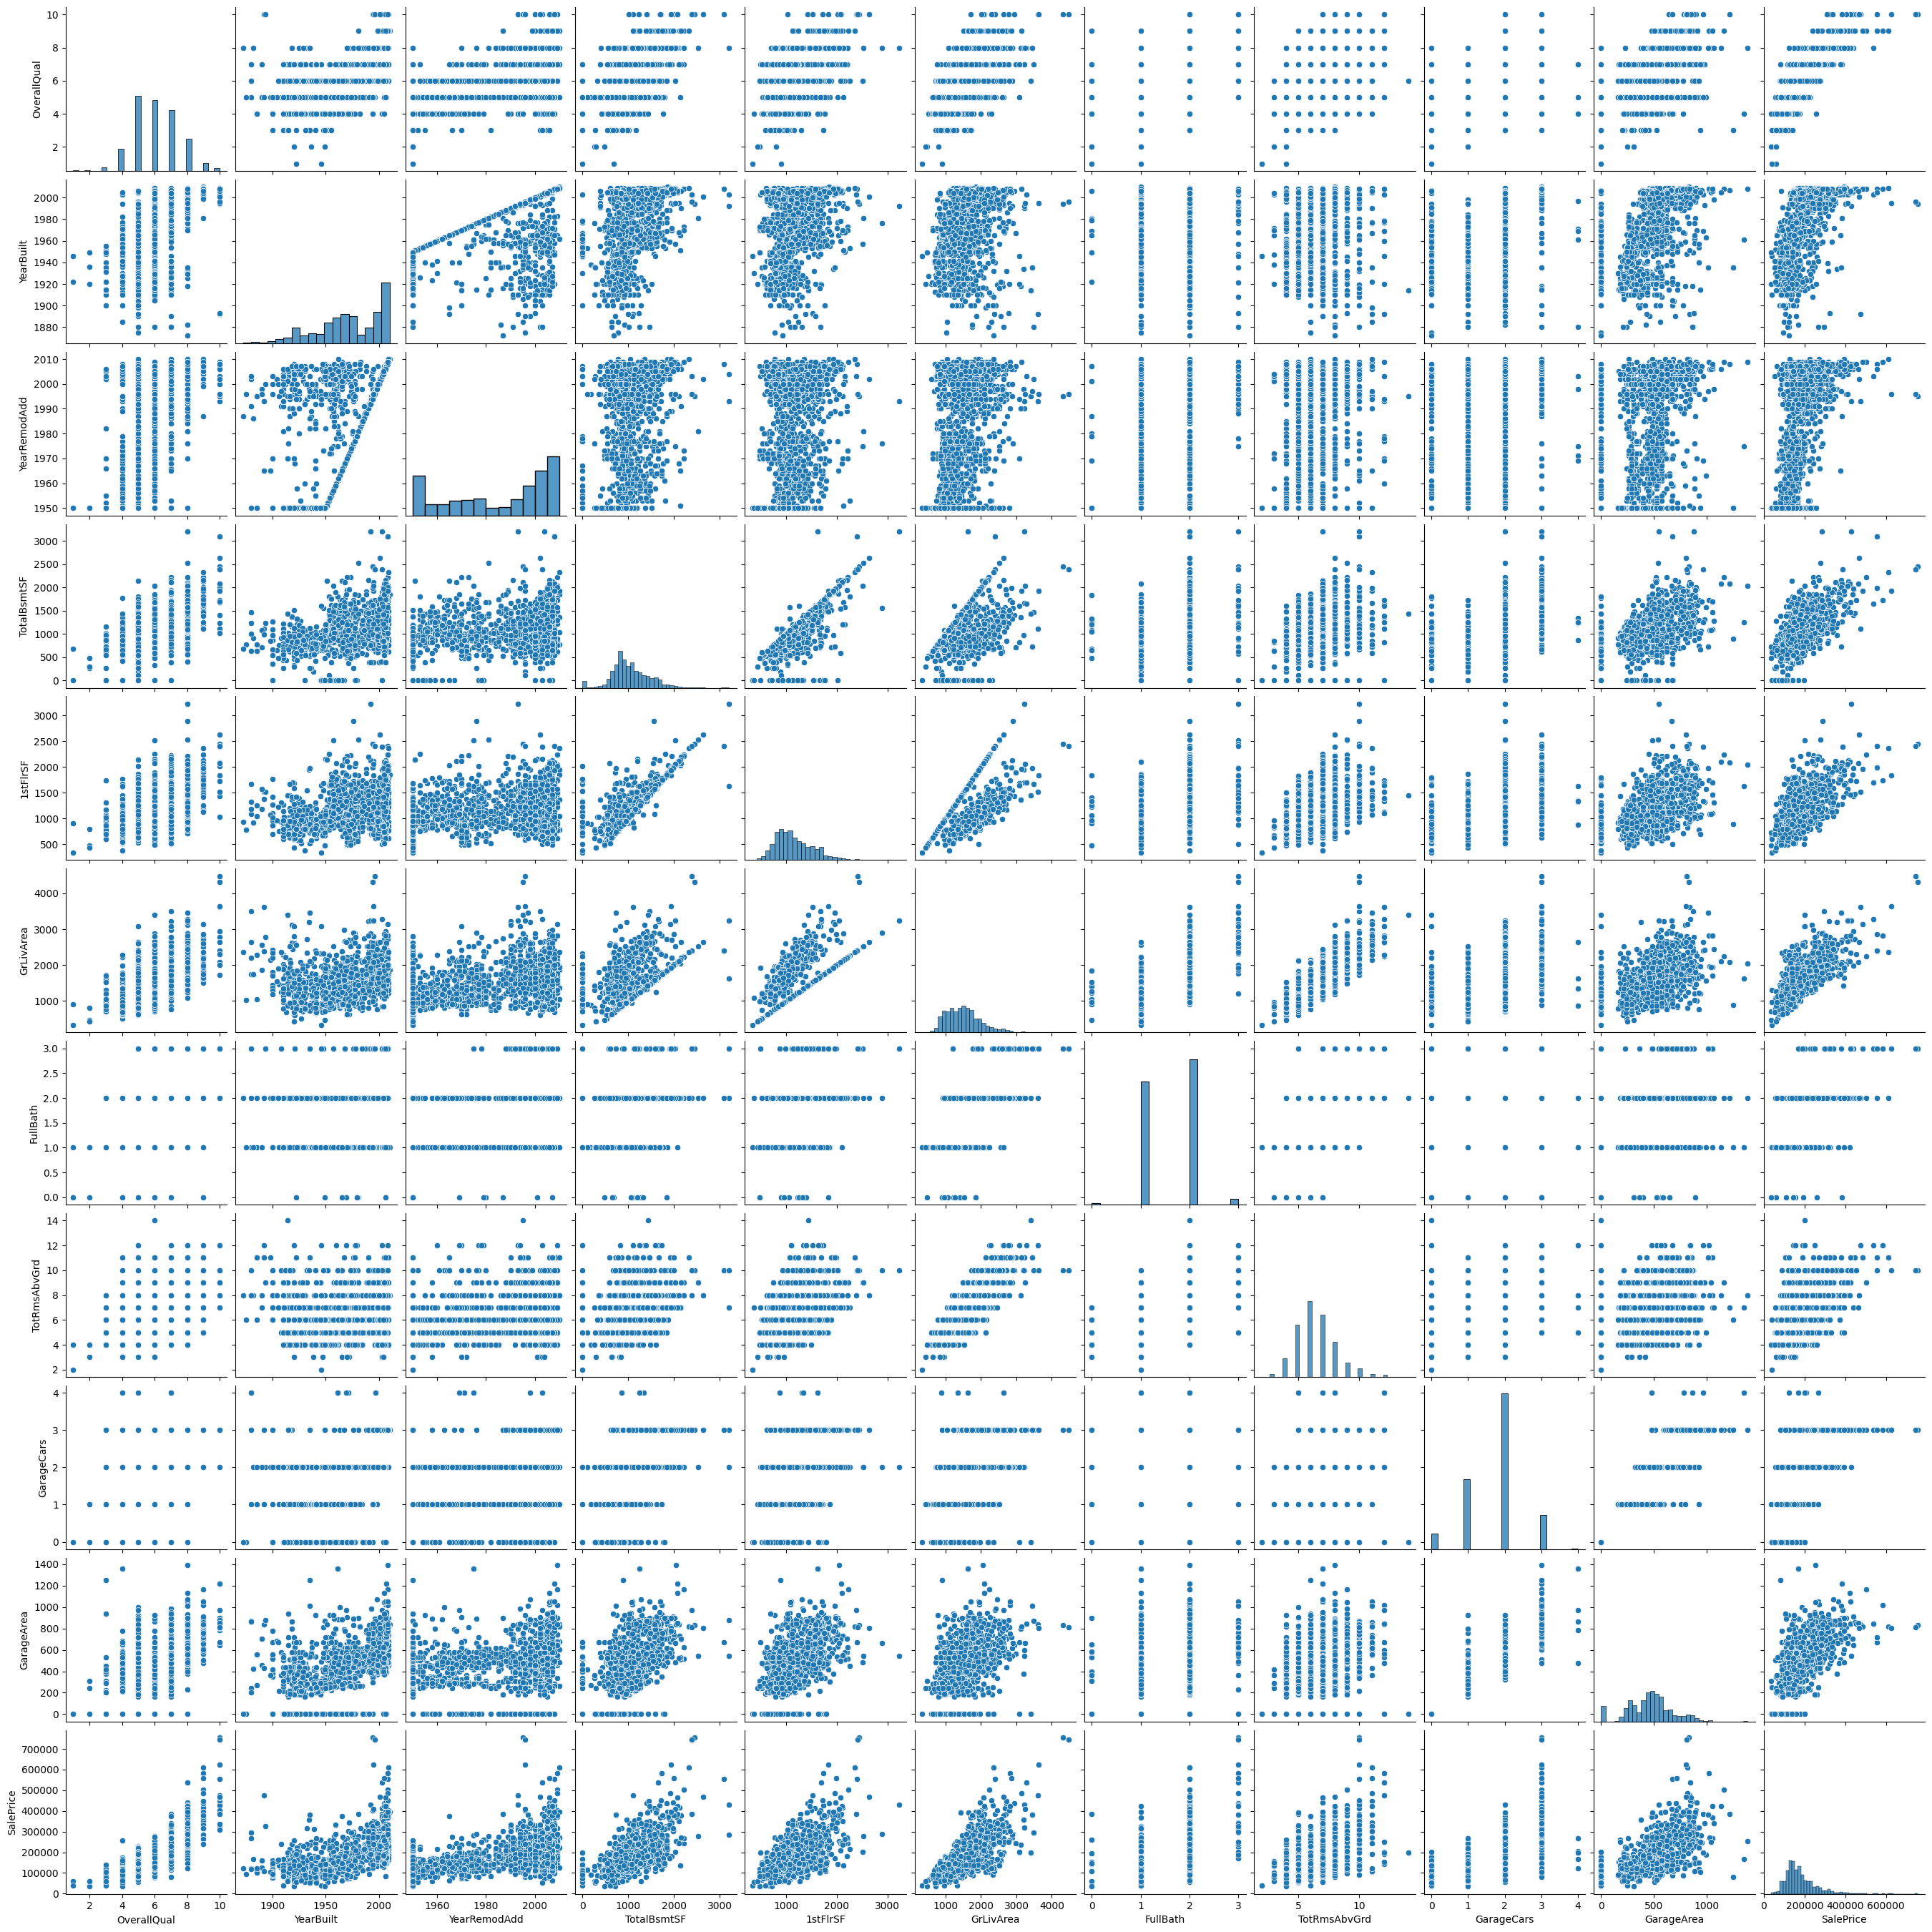

In [12]:
sns.pairplot(df[important_num_cols])

<Figure size 1000x800 with 0 Axes>

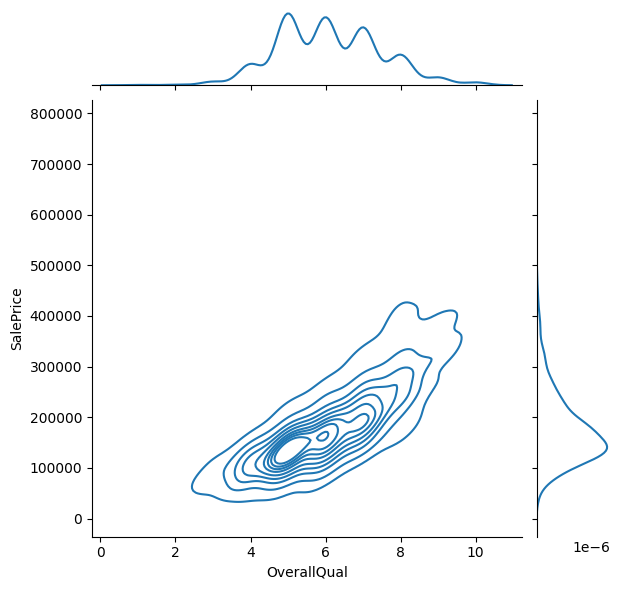

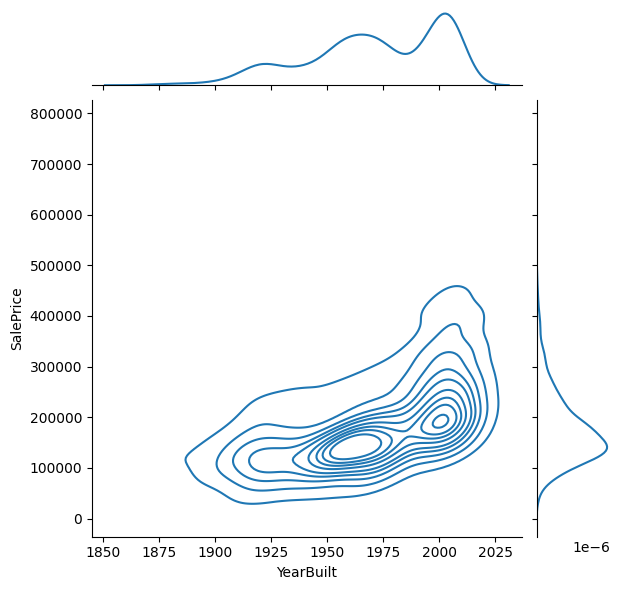

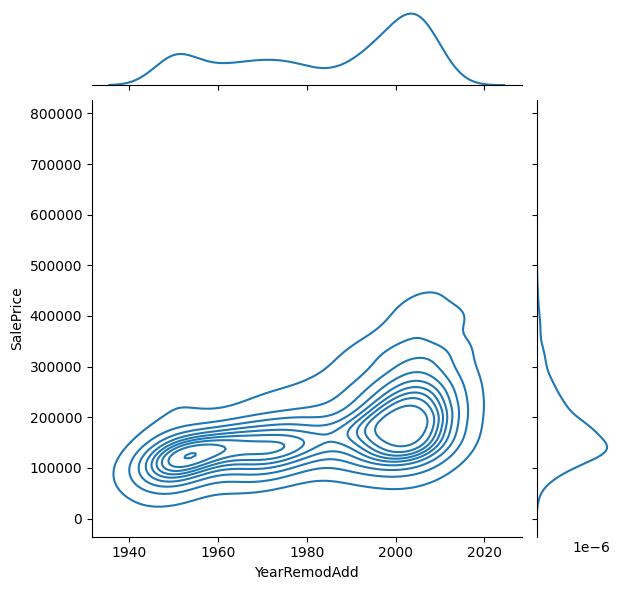

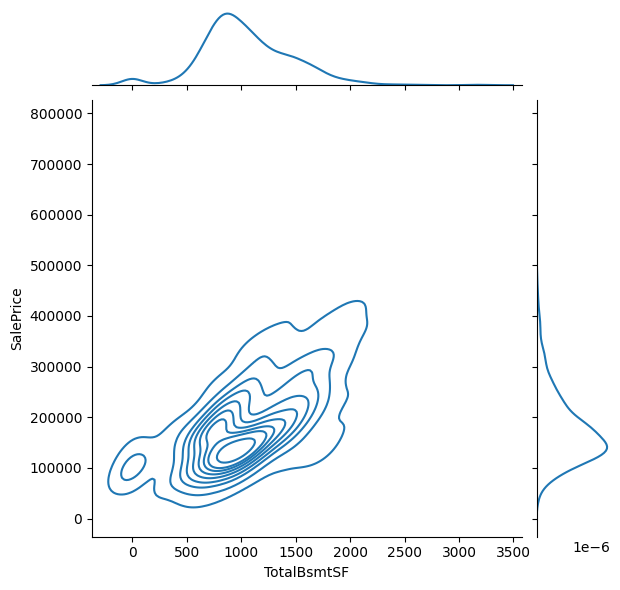

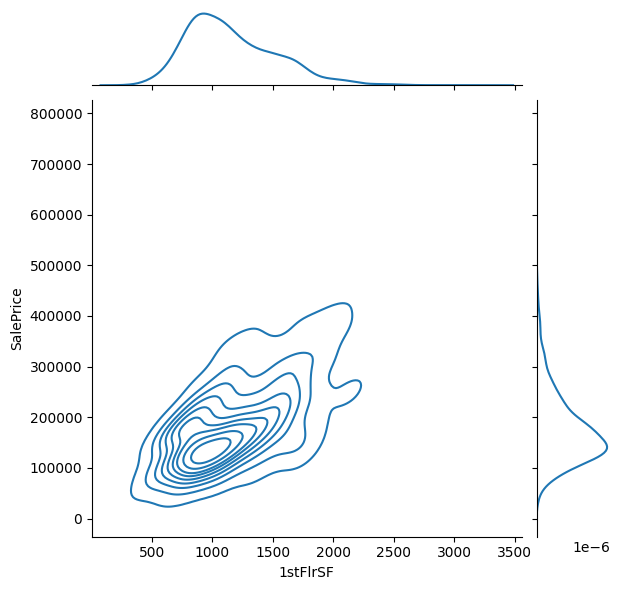

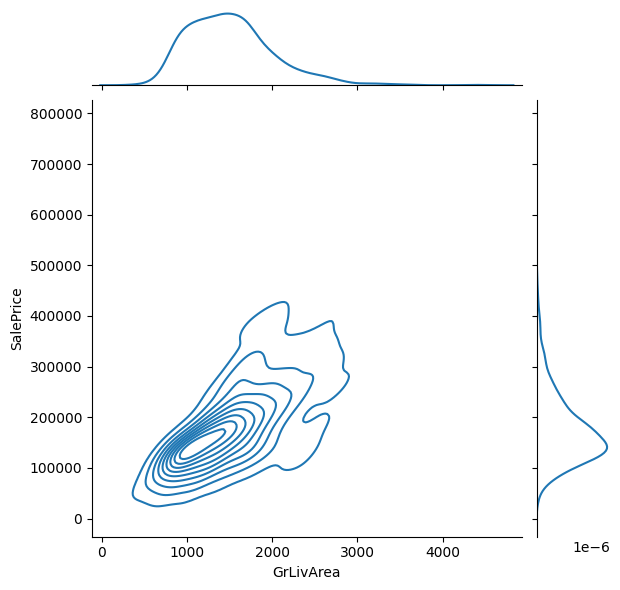

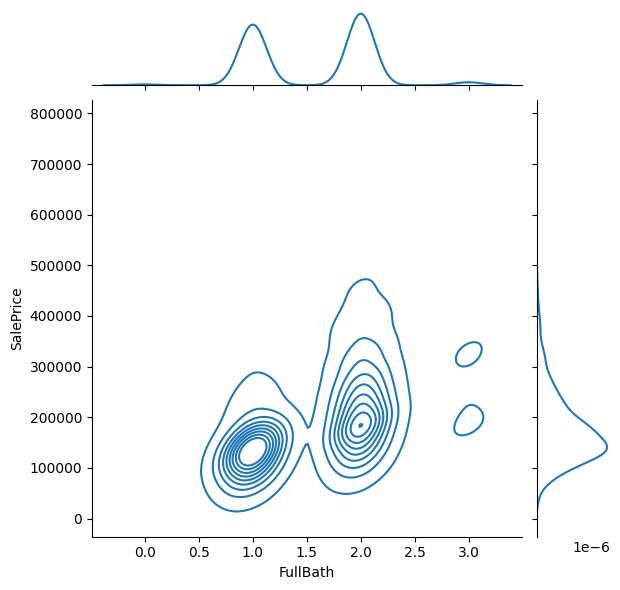

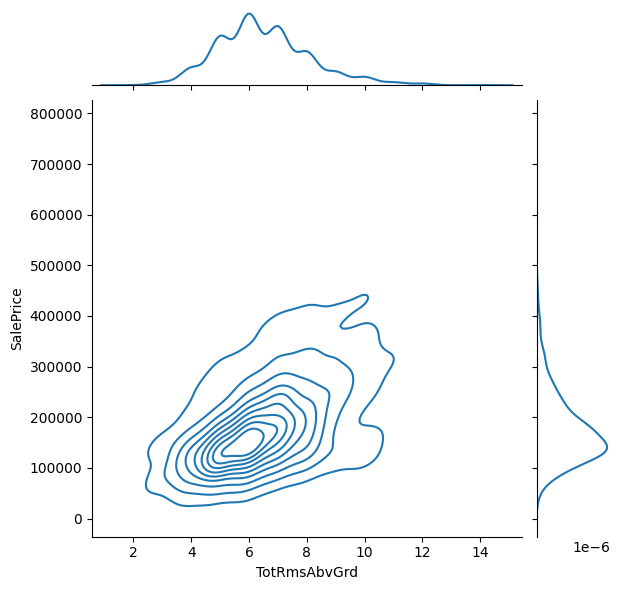

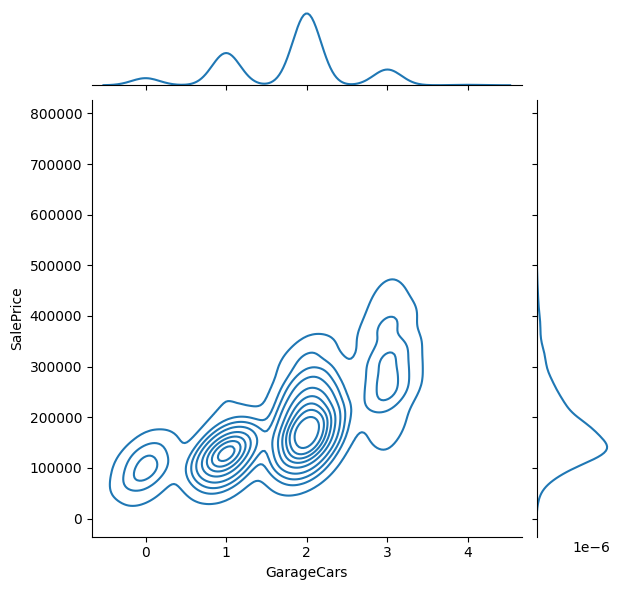

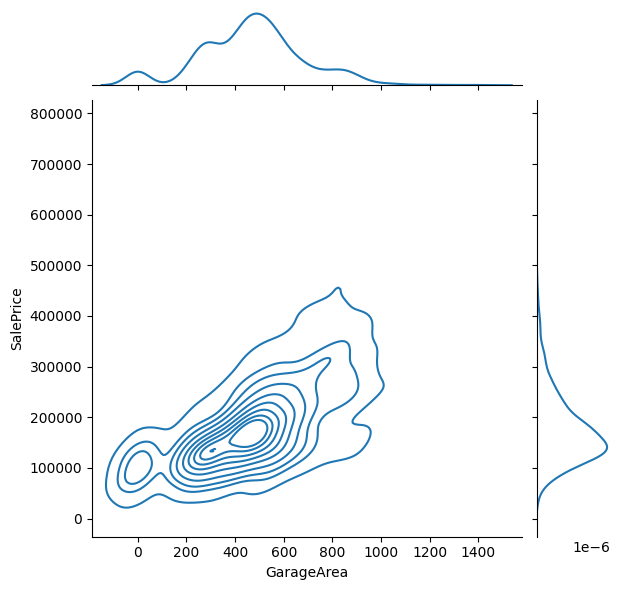

In [13]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

In [14]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])

cat_cols_train = X_train.select_dtypes(include=["object"]).columns.tolist()
cat_cols_test = X_test.select_dtypes(include=["object"]).columns.tolist()
X_train = pd.get_dummies(X_train, columns=cat_cols_train)
X_test  = pd.get_dummies(X_test, columns=cat_cols_test)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [15]:
X_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.658506,1.052959,0.880362,-0.473766,-0.814309,0.393013,0.793546,0.921812,0.313159,0.357973,...,False,False,False,True,False,False,False,False,True,False
1,-0.068293,0.158428,-0.428115,0.504925,0.277348,-0.489391,0.793546,-0.316329,0.313159,-0.056795,...,False,False,False,True,False,False,False,False,True,False
2,0.658506,0.986698,0.831900,-0.319490,-0.642225,0.542706,0.793546,-0.316329,0.313159,0.640770,...,False,False,False,True,False,False,False,False,True,False
3,0.658506,-1.862551,-0.718888,-0.714823,-0.531984,0.406800,-1.025620,0.302742,1.652119,0.801022,...,False,False,False,True,True,False,False,False,False,False
4,1.385305,0.953567,0.734975,0.222888,-0.037243,1.354202,0.793546,1.540882,1.652119,1.715398,...,False,False,False,True,False,False,False,False,True,False


In [16]:
X_train.shape, Y_train.shape, X_test.shape

((1458, 239), (1458,), (1459, 239))

In [17]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, prediction):
    mae = mean_absolute_error(y,prediction)
    mse = mean_squared_error(y,prediction)
    rmse = np.sqrt(mean_squared_error(y,prediction))
    r_squared = r2_score(y,prediction)
    return mae, mse, rmse, r_squared

In [18]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_train_pred1 = lin_reg.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 SCORE:", r_squared)
print("-"*30)

rmse_cross_val= rmse_cv(lin_reg)
print("RMSE (Cross-Validation):", rmse_cross_val)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 14709.08207027768
MSE: 483057014.76047546
RMSE: 21978.55806827362
R2 SCORE: 0.9235079792918072
------------------------------
RMSE (Cross-Validation): 27781.638311064955


In [20]:
ridge = Ridge()
ridge.fit(X_train,Y_train)
Y_train_pred2 = ridge.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 14829.011828107154
MSE: 489912927.6577243
RMSE: 22133.976770063808
R2 Score: 0.9224223463017346
------------------------------
RMSE Cross-Validation: 26806.109485548892


In [21]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
Y_train_pred3 = lasso.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 14714.945346917611
MSE: 483147395.70531124
RMSE: 21980.61408844874
R2 Score: 0.9234936674799655
------------------------------
RMSE Cross-Validation: 27653.342728673986


In [22]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, Y_train)
Y_train_pred4 = elastic_net.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 19953.09710198176
MSE: 1005473730.6951127
RMSE: 31709.205772064248
R2 Score: 0.8407833545942588
------------------------------
RMSE Cross-Validation: 32195.32448149335


In [23]:
svr = SVR(C=100000)
svr.fit(X_train, Y_train)
Y_train_pred5 = svr.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred5)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 6025.022027214325
MSE: 270986136.9247643
RMSE: 16461.6565668454
R2 Score: 0.9570893775188
------------------------------
RMSE Cross-Validation: 25371.68286785964


In [24]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_train_pred6 = random_forest.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred6)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 6645.06928097851
MSE: 103890923.28850552
RMSE: 10192.6896984312
R2 Score: 0.9835488846807906
------------------------------
RMSE Cross-Validation: 27764.953152349062


In [25]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, Y_train)
Y_train_pred7 = xgb.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred7)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 5821.68798828125
MSE: 62844812.0
RMSE: 7927.471980398291
R2 Score: 0.9900485277175903
------------------------------
RMSE Cross-Validation: 26064.91357916744


In [26]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, Y_train)
Y_train_pred8 = lin_reg.predict(X_train_2d)

mae, mse, rmse, r_squared = evaluation(Y_train, Y_train_pred8)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 27.34224965749601
MSE: 168997.67661179698
RMSE: 411.09326996655756
R2 Score: 0.9999732392380526
------------------------------
RMSE Cross-Validation: 27781.638311064955


In [27]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,SVR,6025.022027,2.709861e+08,16461.656567,0.957089,25371.682868
6,XGBRegressor,5821.687988,6.284481e+07,7927.471980,0.990049,26064.913579
1,Ridge,14829.011828,4.899129e+08,22133.976770,0.922422,26806.109486
2,Lasso,14714.945347,4.831474e+08,21980.614088,0.923494,27653.342729
5,RandomForestRegressor,6645.069281,1.038909e+08,10192.689698,0.983549,27764.953152
0,LinearRegression,14709.082070,4.830570e+08,21978.558068,0.923508,27781.638311
7,Polynomial Regression (degree=2),27.342250,1.689977e+05,411.093270,0.999973,27781.638311
3,ElasticNet,19953.097102,1.005474e+09,31709.205772,0.840783,32195.324481


In [28]:
Y_test = xgb.predict(X_test)

submission = pd.DataFrame({"Id": test_df["Id"], "SalePrice": Y_test})
submission.to_csv("submission.csv",index=False)